In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Vincent Halim - 0706022310016
# Jonathan Sunjaya - 0706022310059

In [3]:
pd.set_option('display.max_column',None)
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/Bank%20(1).csv"
df = pd.read_csv(url,sep = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [6]:
df.isna().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'age': array([30, 33, 35, 59, 36, 39, 41, 43, 20, 31, 40, 56, 37, 25, 38, 42, 44,
        26, 55, 67, 53, 68, 32, 49, 78, 23, 52, 34, 61, 45, 48, 57, 54, 63,
        51, 29, 50, 27, 60, 28, 21, 58, 22, 46, 24, 77, 75, 47, 70, 65, 64,
        62, 66, 19, 81, 83, 80, 71, 72, 69, 79, 73, 86, 74, 76, 87, 84]),
 'job': array(['unemployed', 'services', 'management', 'blue-collar',
        'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
        'housemaid', 'retired', 'unknown'], dtype=object),
 'marital': array(['married', 'single', 'divorced'], dtype=object),
 'education': array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object),
 'default': array(['no', 'yes'], dtype=object),
 'balance': array([ 1787,  4789,  1350, ...,  -333, -3313,  1137]),
 'housing': array(['no', 'yes'], dtype=object),
 'loan': array(['no', 'yes'], dtype=object),
 'contact': array(['cellular', 'unknown', 'telephone'], dtype=object),
 'day': array([19, 11, 16,  3,  5, 23, 14,  6, 17, 20,

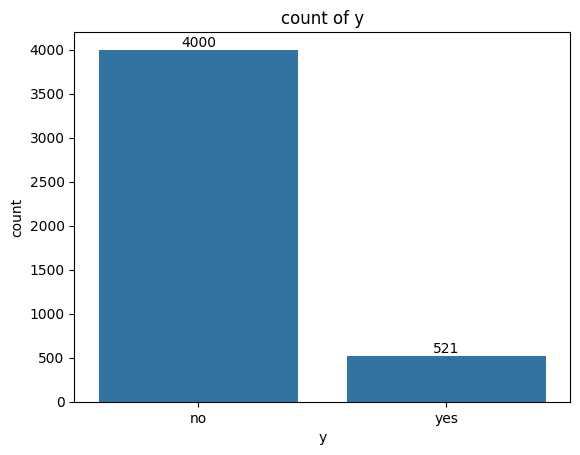

In [8]:
#  ini visualisasi
ax = sns.countplot(data=df, x='y')
plt.title('count of y')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# Data Encoding

In [9]:
df_encoded = df.copy()

one_hot_map = {
    'default' : {'no': 0, 'yes' : 1},
    'housing' : {'no': 0, 'yes' : 1},
    'loan' : {'no': 0, 'yes' : 1},
    'y' : {'no': 0, 'yes' : 1}
}

for col,mapping in one_hot_map.items():
    df_encoded[col] = df_encoded[col].map(mapping)

ordinal_cols = ['education', 'month']


ordinal_encoder = OrdinalEncoder(categories=[
    ['primary', 'secondary', 'tertiary','unknown'],  
    ['jan', 'feb', 'mar', 'apr', 'may', 'jun',
     'jul', 'aug', 'sep', 'oct', 'nov', 'dec'] 
])

df_encoded[ordinal_cols] = ordinal_encoder.fit_transform(df_encoded[ordinal_cols])

nominal_cols = ['job','poutcome','contact','marital']
encoder = OrdinalEncoder()
df_encoded[nominal_cols] = encoder.fit_transform(df_encoded[nominal_cols]) 

encode_dict = {}

for col, cats in zip(nominal_cols,encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

import pprint
pprint.pprint(encode_dict)

df_encoded.sample(n = 5)

{'contact': {'cellular': 0, 'telephone': 1, 'unknown': 2},
 'job': {'admin.': 0,
         'blue-collar': 1,
         'entrepreneur': 2,
         'housemaid': 3,
         'management': 4,
         'retired': 5,
         'self-employed': 6,
         'services': 7,
         'student': 8,
         'technician': 9,
         'unemployed': 10,
         'unknown': 11},
 'marital': {'divorced': 0, 'married': 1, 'single': 2},
 'poutcome': {'failure': 0, 'other': 1, 'success': 2, 'unknown': 3}}


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
755,32,0.0,2.0,1.0,0,739,1,0,0.0,20,10.0,91,3,-1,0,3.0,0
2437,37,0.0,2.0,1.0,0,0,1,0,0.0,16,3.0,640,2,-1,0,3.0,0
1091,50,1.0,1.0,0.0,0,0,0,0,0.0,11,7.0,72,5,-1,0,3.0,0
4265,30,1.0,2.0,1.0,0,1073,1,0,0.0,5,4.0,1130,4,-1,0,3.0,0
2412,58,3.0,1.0,0.0,0,419,0,1,2.0,5,5.0,295,3,-1,0,3.0,0


In [10]:
df.loc[480]

age                  37
job          management
marital          single
education       unknown
default              no
balance             715
housing             yes
loan                 no
contact         unknown
day                  20
month               may
duration            247
campaign              2
pdays                -1
previous              0
poutcome        unknown
y                    no
Name: 480, dtype: object

# Data Separate

In [11]:
X = df_encoded.drop('y',axis = 1)
y = df_encoded['y']

In [12]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,10.0,1.0,0.0,0,1787,0,0,0.0,19,9.0,79,1,-1,0,3.0
1,33,7.0,1.0,1.0,0,4789,1,1,0.0,11,4.0,220,1,339,4,0.0
2,35,4.0,2.0,2.0,0,1350,1,0,0.0,16,3.0,185,1,330,1,0.0
3,30,4.0,1.0,2.0,0,1476,1,1,2.0,3,5.0,199,4,-1,0,3.0
4,59,1.0,1.0,1.0,0,0,1,0,2.0,5,4.0,226,1,-1,0,3.0


In [13]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

# split DAta

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state= 0)

In [15]:
X_train.shape, X_test.shape

((3390, 16), (1131, 16))

In [16]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
4384,52,4.0,2.0,2.0,0,4,0,1,0.0,28,6.0,30,9,-1,0,3.0
2560,44,1.0,1.0,1.0,0,1071,1,0,0.0,11,4.0,143,3,357,1,0.0
1470,55,1.0,1.0,0.0,0,4103,0,0,0.0,19,10.0,291,1,-1,0,3.0
1771,37,4.0,1.0,2.0,0,347,1,0,0.0,22,6.0,282,1,-1,0,3.0
2604,57,4.0,1.0,3.0,0,0,0,0,0.0,30,8.0,585,1,-1,0,3.0


In [17]:
X_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
4274,35,1.0,1.0,0.0,0,378,1,0,2.0,16,4.0,427,3,-1,0,3.0
72,31,4.0,2.0,2.0,0,6248,1,0,2.0,9,4.0,154,2,-1,0,3.0
1065,30,10.0,1.0,2.0,0,0,1,0,0.0,18,10.0,756,1,-1,0,3.0
3185,42,0.0,1.0,1.0,0,529,1,1,0.0,19,10.0,193,3,-1,0,3.0
130,41,1.0,1.0,0.0,0,168,1,0,0.0,18,10.0,187,3,-1,0,3.0


# Decision Tree Classifier(belum balance)

In [18]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3007
           1       1.00      1.00      1.00       383

    accuracy                           1.00      3390
   macro avg       1.00      1.00      1.00      3390
weighted avg       1.00      1.00      1.00      3390


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       993
           1       0.47      0.49      0.48       138

    accuracy                           0.87      1131
   macro avg       0.70      0.71      0.70      1131
weighted avg       0.87      0.87      0.87      1131



# XGBoost (belum balance)

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

# Buat model
gb = GradientBoostingClassifier(
    n_estimators=200,      # jumlah pohon boosting
    learning_rate=0.1,     # seberapa cepat model belajar
    max_depth=3,           # kedalaman tiap pohon
    random_state=42
)


In [20]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200, random_state=42)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = gb.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[964  29]
 [ 88  50]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       993
           1       0.63      0.36      0.46       138

    accuracy                           0.90      1131
   macro avg       0.77      0.67      0.70      1131
weighted avg       0.88      0.90      0.88      1131



# Random Forest(Belum Balance)

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,      # jumlah pohon
    max_depth=None,        # None artinya pohon akan tumbuh bebas (hingga murni)
    min_samples_split=2,   # minimum sampel untuk split node
    min_samples_leaf=1,    # minimum sampel per daun
    random_state=42,
    n_jobs=-1              # gunakan semua core CPU agar cepat
)


In [23]:
rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[969  24]
 [ 90  48]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.94       993
           1       0.67      0.35      0.46       138

    accuracy                           0.90      1131
   macro avg       0.79      0.66      0.70      1131
weighted avg       0.88      0.90      0.88      1131



# OverSampling Using Smotenc

In [25]:
categorical_features = [
    'job',
    'marital',
    'education',
    'poutcome',
    'loan',
    'default',
    'housing',
    'month',
    'contact'
]

smotenc = SMOTENC(categorical_features=categorical_features,random_state=42)
X,y = smotenc.fit_resample(X,y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((5600, 16), (2400, 16))

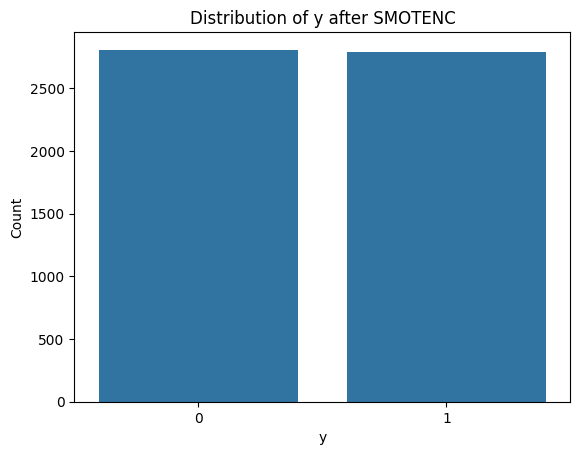

In [26]:
#  ini visualisasi
# visualize the distribution of target class after SMOTENC

sns.countplot(x=y_train)
plt.title('Distribution of y after SMOTENC')
plt.xlabel('y')
plt.ylabel('Count')
plt.show()

# Decision tree no clasification

In [27]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2808
           1       1.00      1.00      1.00      2792

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1192
           1       0.87      0.88      0.87      1208

    accuracy                           0.87      2400
   macro avg       0.87      0.87      0.87      2400
weighted avg       0.87      0.87      0.87      2400



# Gradient Boost with no classification

In [28]:
gb = GradientBoostingClassifier(
    n_estimators=200,      # jumlah pohon boosting
    learning_rate=0.1,     # seberapa cepat model belajar
    max_depth=3,           # kedalaman tiap pohon
    random_state=42
)

In [29]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200, random_state=42)

In [30]:
# Prediksi di data training
y_pred_train = gb.predict(X_train)

# Prediksi di data test
y_pred_test = gb.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))



=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      2808
           1       0.92      0.95      0.94      2792

    accuracy                           0.93      5600
   macro avg       0.93      0.93      0.93      5600
weighted avg       0.93      0.93      0.93      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1192
           1       0.89      0.91      0.90      1208

    accuracy                           0.90      2400
   macro avg       0.90      0.90      0.90      2400
weighted avg       0.90      0.90      0.90      2400



# Random Forest with no classification

In [31]:
rf = RandomForestClassifier(
    n_estimators=200,      # jumlah pohon
    max_depth=None,        # None artinya pohon akan tumbuh bebas (hingga murni)
    min_samples_split=2,   # minimum sampel untuk split node
    min_samples_leaf=1,    # minimum sampel per daun
    random_state=42,
    n_jobs=-1              # gunakan semua core CPU agar cepat
)

In [32]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [33]:
# Prediksi pada TRAINING set
y_pred_train = rf.predict(X_train)

# Prediksi pada TEST set
y_pred_test = rf.predict(X_test)

# Evaluasi model
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))   

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))     



=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2808
           1       1.00      1.00      1.00      2792

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1192
           1       0.92      0.93      0.93      1208

    accuracy                           0.93      2400
   macro avg       0.93      0.93      0.93      2400
weighted avg       0.93      0.93      0.93      2400



# Decision Tree Classifier Using Gini / Entropy

In [34]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'random_state': [0, 41, 42]
}

dtree_clf = DecisionTreeClassifier() 
grid_search = GridSearchCV(estimator=dtree_clf, param_grid=param_grid,
                          n_jobs=-1, verbose=2, scoring='f1') 
grid_search.fit(X_train, y_train)

best_dtree_clf = grid_search.best_estimator_ 
y_pred_test = best_dtree_clf.predict(X_test)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation f1 score: {:.3f}".format(grid_search.best_score_))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters:  {'criterion': 'entropy', 'max_depth': 10, 'random_state': 42}
Best cross-validation f1 score: 0.865


In [35]:
best_params = grid_search.best_params_

final_tree = DecisionTreeClassifier(**best_params)
final_tree.fit(X_train, y_train)

y_pred_train = final_tree.predict(X_train)
y_pred_test  = final_tree.predict(X_test)

from sklearn.metrics import classification_report
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      2808
           1       0.91      0.94      0.93      2792

    accuracy                           0.93      5600
   macro avg       0.93      0.93      0.93      5600
weighted avg       0.93      0.93      0.93      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1192
           1       0.86      0.87      0.87      1208

    accuracy                           0.86      2400
   macro avg       0.87      0.86      0.86      2400
weighted avg       0.87      0.86      0.86      2400



# Random Forest Using K-Fold

In [36]:
from sklearn.model_selection import StratifiedKFold

param_grid = {
    'n_estimators' : [100, 200, 300],
    'max_depth' : [3, 5, 7, None],
    'max_features': ['sqrt', 'log2', None]
}

rf = RandomForestClassifier(random_state=42)  
kfold = StratifiedKFold(n_splits = 5,shuffle=True, random_state=42) 

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=kfold,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred_train = best_rf.predict(X_train)
y_pred_test = best_rf.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))

Fitting 5 folds for each of 36 candidates, totalling 180 fits

=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2808
           1       1.00      1.00      1.00      2792

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1192
           1       0.92      0.93      0.93      1208

    accuracy                           0.93      2400
   macro avg       0.93      0.93      0.93      2400
weighted avg       0.93      0.93      0.93      2400



# Gradient Boost Classifier

In [37]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5]
}


gb = GradientBoostingClassifier(random_state=42)


grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)


grid_search.fit(X_train, y_train)
best_gb = grid_search.best_estimator_


y_pred_train = best_gb.predict(X_train)
y_pred_test = best_gb.predict(X_test)


print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


Fitting 5 folds for each of 27 candidates, totalling 135 fits

=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2808
           1       1.00      1.00      1.00      2792

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      1192
           1       0.91      0.94      0.93      1208

    accuracy                           0.92      2400
   macro avg       0.92      0.92      0.92      2400
weighted avg       0.92      0.92      0.92      2400



# Feature Importance

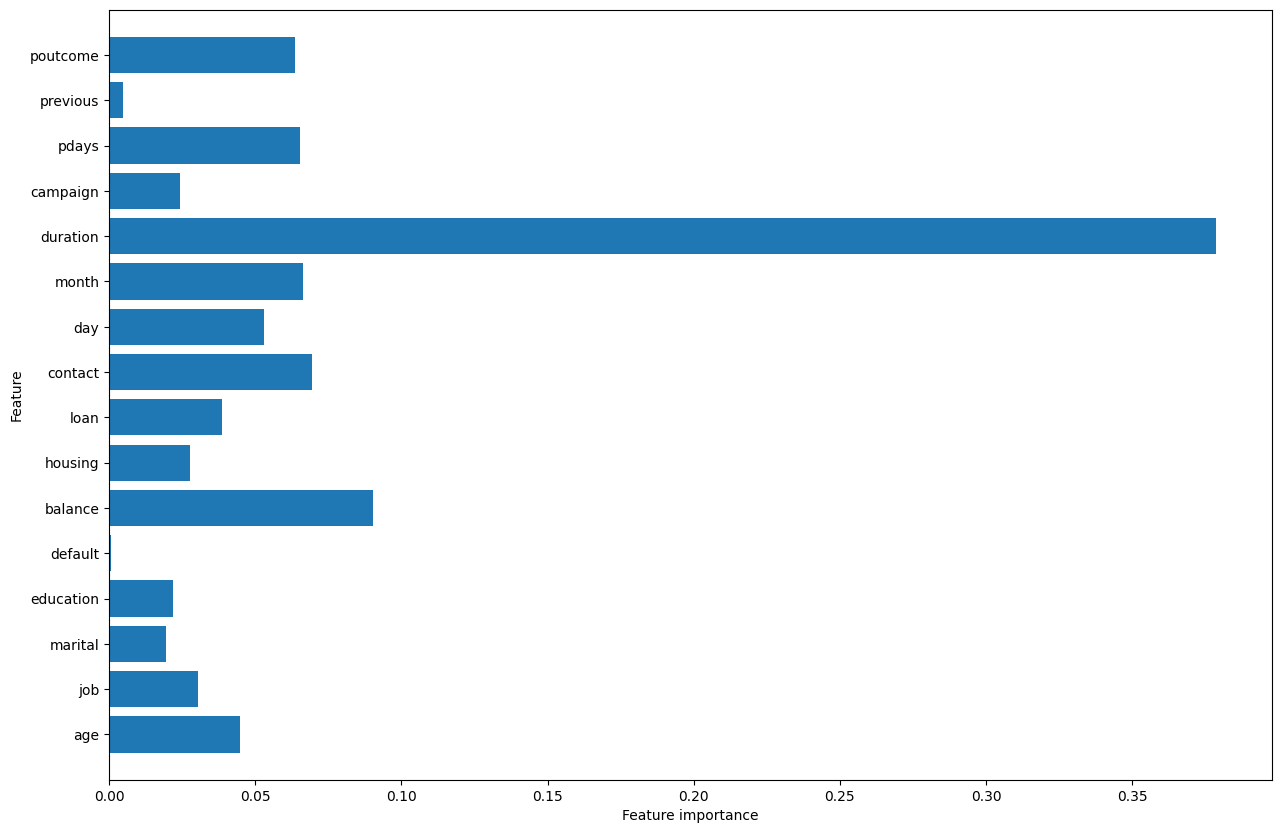

In [38]:
def plot_feature_importances_attrition(model):
    plt.figure(figsize=(15,10))
    n_features = X_train.shape[1]  # Get the number of features from X_train
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns) # Use column names from X_train as labels
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_attrition(tree)

In [39]:
feature_importances = pd.Series(tree.feature_importances_, index=X_train.columns)
important_features = feature_importances[feature_importances > 0.05].sort_values(ascending=False)
important_features

duration    0.378697
balance     0.090348
contact     0.069537
month       0.066451
pdays       0.065413
poutcome    0.063513
day         0.052885
dtype: float64

In [40]:
important_features = ["duration", "age", "day", "balance"]
X_importance = df_encoded[important_features] #input
y_importance = df_encoded['y']

In [41]:
display(X_importance)
display(y_importance)

,duration,age,day,balance
0,79,30,19,1787
1,220,33,11,4789
2,185,35,16,1350
3,199,30,3,1476
4,226,59,5,0
...,...,...,...,...
4516,329,33,30,-333
4517,153,57,9,-3313
4518,151,57,19,295
4519,129,28,6,1137


0       0
1       0
2       0
3       0
4       0
       ..
4516    0
4517    0
4518    0
4519    0
4520    0
Name: y, Length: 4521, dtype: int64

In [42]:
categorical_features = ["duration", "balance"]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_importance, y_importance = smotenc.fit_resample(X_importance, y_importance)

X_train, X_test, y_train, y_test = train_test_split(X_importance, y_importance, test_size=0.3, random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((5600, 4), (2400, 4))

# Decision Tree with importance feature

In [43]:
X_train_importance, X_test_importance, y_train_importance, y_test_importance = train_test_split(X_importance, y_importance, test_size=0.2, random_state=42)

importance_tree = DecisionTreeClassifier(random_state=42)
importance_tree.fit(X_train_importance, y_train_importance)

y_pred_train_importance = importance_tree.predict(X_train_importance)
y_pred_test_importance = importance_tree.predict(X_test_importance)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_importance))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_importance))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3199
           1       1.00      1.00      1.00      3201

    accuracy                           1.00      6400
   macro avg       1.00      1.00      1.00      6400
weighted avg       1.00      1.00      1.00      6400


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.88      0.78      0.82       801
           1       0.80      0.89      0.84       799

    accuracy                           0.83      1600
   macro avg       0.84      0.83      0.83      1600
weighted avg       0.84      0.83      0.83      1600



# Gradient Boosting with Importance Feature

In [44]:
gb_importance = GradientBoostingClassifier(
    n_estimators= 200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb_importance.fit(X_train_importance, y_train_importance)

y_pred_test_importance = gb_importance.predict(X_train_importance)
y_pred_test_importance = gb_importance.predict(X_test_importance)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_importance))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_importance))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3199
           1       1.00      1.00      1.00      3201

    accuracy                           1.00      6400
   macro avg       1.00      1.00      1.00      6400
weighted avg       1.00      1.00      1.00      6400


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       801
           1       0.79      0.81      0.80       799

    accuracy                           0.80      1600
   macro avg       0.80      0.80      0.80      1600
weighted avg       0.80      0.80      0.80      1600



# Random Forest with important features

In [45]:
rf_importance = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100,200,300],
    'max_depth' : [5,10,5,None],
    'max_features' : ['sqrt', 'log2', None]
}

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=rf_importance,
    param_grid=param_grid,
    cv=kfold,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_importance,y_train_importance)

best_rf_importance = grid_search.best_estimator_

y_pred_train_importance = best_rf_importance.predict(X_train_importance)
y_pred_test_importance = best_rf_importance.predict(X_test_importance)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_importance))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_importance))


Fitting 5 folds for each of 36 candidates, totalling 180 fits

=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3199
           1       1.00      1.00      1.00      3201

    accuracy                           1.00      6400
   macro avg       1.00      1.00      1.00      6400
weighted avg       1.00      1.00      1.00      6400


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       801
           1       0.84      0.94      0.89       799

    accuracy                           0.88      1600
   macro avg       0.88      0.88      0.88      1600
weighted avg       0.88      0.88      0.88      1600



**feature importance** 
| Model           | Accuracy | Precision | Recall | F1-score |
|-----------------|-----------|------------|---------|-----------|
| Decision Tree   | 0.83      | 0.80       | 0.89    | 0.84      |
| Random Forest   | 0.88      | 0.84       | 0.82    | 0.87      |
| Gradient Boost  | 0.80      | 0.79       | 0.81    | 0.80      |

**With Classification** 
| Model           | Accuracy | Precision | Recall | F1-score |
|-----------------|-----------|------------|---------|-----------|
| Decision Tree   | 0.86      | 0.86       | 0.87    | 0.87      |
| Random Forest   | 0.93      | 0.92       | 0.93    | 0.93      |
| Gradient Boost  | 0.92      | 0.91       | 0.94    | 0.93      |

**With Before SmotenC** 
| Model           | Accuracy | Precision | Recall | F1-score |
|-----------------|-----------|------------|---------|-----------|
| Decision Tree   | 0.87      | 0.47       | 0.49    | 0.48      |
| Random Forest   | 0.90      | 0.67       | 0.35    | 0.46      |
| Gradient Boost  | 0.90      | 0.63       | 0.36    | 0.46      |

from these 3 tables we can see that model with classification has the highest accuracy meanwhile model with feature importance has the lowest accuracy. but this doesn't mean that model that use feature importance bad because as we can see model before smotenc indeed have high accuracy but their precision,recall and F1-score are very low even under 50% this can be happened because model before smotenc are not balance meanwhile models with feature importance and classification already balance.

1. overall RF is the model which performed the best overall. RF has the highest both in feature importance and with classification and has the same accuracy as gradient boost before smotenc.

2. the esamble methods such as RF and XGboost improve performance compared to a single decision tree. this can be seen from the table. the table for models with classification, we can see decision tree has the lowest accuracy with 86% meanwhile RF has the highest with 93% decision tree also is the lowest in precision,recall and F1-Score. the table with before smotenc, also shows that decision tree is the lowest in accuracy with only 87% and RF and gradient boost has same accuracy. but in table with feature importance, surprisingly gradient boost has the lowest accuracy and the highest is RF. in the end esamble methods are much better than Decision tree.

3. 



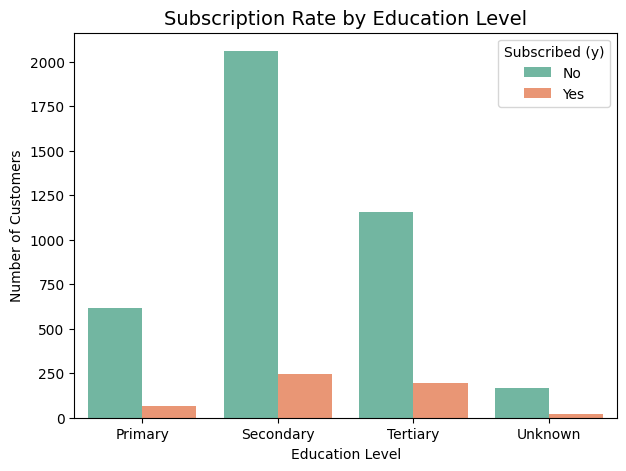

C:\Users\Vincent H\AppData\Local\Temp\ipykernel_17060\3644746735.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_encoded, x='y', y='age', palette='Set3')


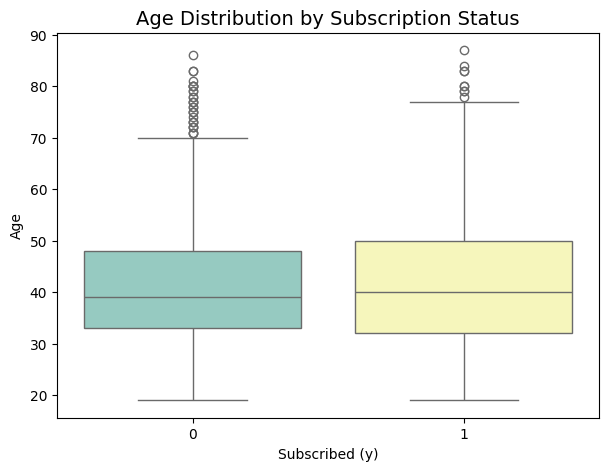

In [50]:

import matplotlib.pyplot as plt
import seaborn as sns

education_mapping = {
    0: 'Primary',
    1: 'Secondary',
    2: 'Tertiary',
    3: 'Unknown'
}

# Terapkan mapping ke kolom education
df_encoded['education_label'] = df_encoded['education'].map(education_mapping)

plt.figure(figsize=(7,5))
sns.countplot(data=df_encoded, x='education_label', hue='y', palette='Set2')

plt.title('Subscription Rate by Education Level', fontsize=14)
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')
plt.legend(title='Subscribed (y)', labels=['No', 'Yes'])
plt.show()


plt.figure(figsize=(7,5))
sns.boxplot(data=df_encoded, x='y', y='age', palette='Set3')
plt.title('Age Distribution by Subscription Status', fontsize=14)
plt.xlabel('Subscribed (y)')
plt.ylabel('Age')
plt.show()



3. how could the bank use this insight : 
 - bank can focus on the segment with the biggest potential which is secondary and tetriotary
 - Tailoring messages, channels, and products for each education segment
 - bank can focus on customer with age betweem 30 to 50


 insights:
 - Young people (20–30) are less interested in subscribing
 - Age 50 and above remains a potential but small population
 - Most of the customers have “Secondary” education
 - “Unknown” has a small number and a very low conversion rate.